In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import *
from string import punctuation
from collections import Counter

In [2]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tfost\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import seaborn as sns
from nltk.corpus import stopwords

In [4]:
reviews_df = pd.read_csv('pressure.csv', index_col=0)

In [5]:
reviews_df.shape

(2250, 6)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 2249
Data columns (total 6 columns):
author     2250 non-null object
body       2250 non-null object
date       2250 non-null object
helpful    2250 non-null object
rating     2250 non-null object
title      2250 non-null object
dtypes: object(6)
memory usage: 123.0+ KB


In [7]:
reviews_df.tail()

,author,body,date,helpful,rating,title
2245,['Amazonaholic'],['It would be nice if people would review this...,"['on November 8, 2014']",['\n 15 people found this helpful.\n '],['5.0 out of 5 stars'],['It would be nice if people would review this...
2246,['sab'],['why is the warning sign of this causes cance...,"['on August 18, 2015']",['\n 8 people found this helpful.\n '],['1.0 out of 5 stars'],['why is the warning sign of this causes cance...
2247,['Darlene Lindsey M'],"[""I went to 3 stores that the manufacturer of ...","['on December 3, 2014']",['\n 6 people found this helpful.\n '],['1.0 out of 5 stars'],"[""DON'T BUY THIS POOR LOOKING QUALITY PRODUCT!""]"
2248,['Wayne Brault'],['Ordered the wrong pressure cooker for my wif...,"['on November 19, 2016']",['\n 2 people found this helpful.\n '],['1.0 out of 5 stars'],['Ordered the wrong pressure cooker for my wif...
2249,['Amazon Customer'],['I purchased it for a gift'],"['on February 3, 2017']",[],['1.0 out of 5 stars'],['One Star']


In [8]:
reviews_df.drop(['author', 'date','helpful', 'title'], axis=1, inplace=True)

In [48]:
reviews_df['Body_Length'] = reviews_df['body'].apply(len)

In [10]:
reviews_df.head()

,body,rating,Body_Length
0,"['Before I begin my review, I want to state th...",['5.0 out of 5 stars'],3600
1,"[""good news/ bad news...I bought this about si...",['2.0 out of 5 stars'],1529
2,"[""So I'm just a guy who has never used a press...",['5.0 out of 5 stars'],1757
3,"['Stopped working after 2 months, it worked o...",['1.0 out of 5 stars'],199
4,"['Quit working after about 4 months, it costs...",['1.0 out of 5 stars'],192


In [11]:
#Pulls out the single digit value of the star rating
reviews_df['rating'] = reviews_df['rating'].str[2:3]

In [12]:
# Converts the rating to numeric
reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce').fillna(0).astype(np.int64)

Text(0.5,0,'Stars')

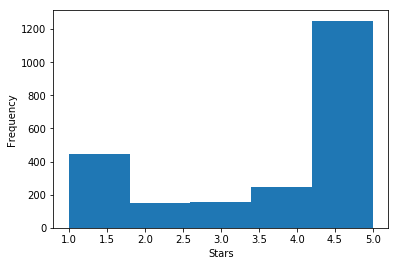

In [13]:
reviews_df['rating'].plot(kind='hist', bins=5)
plt.xlabel("Stars")

In [14]:
low_ratings = reviews_df['rating']<4
high_ratings = reviews_df['rating']> 3

In [15]:
reviews_df['rating'].value_counts()

5    1251
1     446
4     245
3     156
2     152
Name: rating, dtype: int64

In [16]:
# https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9

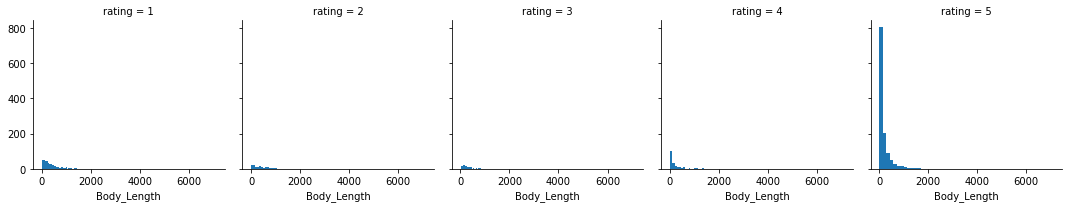

In [17]:
starbody = sns.FacetGrid(data=reviews_df, col='rating')
starbody.map(plt.hist, 'Body_Length', bins=50)

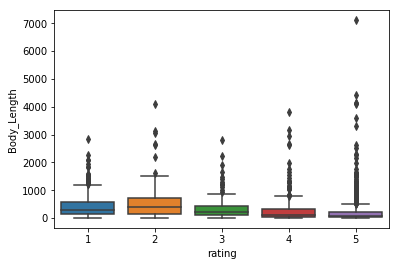

In [18]:
sns.boxplot(x='rating', y='Body_Length', data=reviews_df)

In [50]:
# reviews_df['Body_Length'] = pd.to_numeric(reviews_df['Body_Length'], errors='coerce').fillna(0).astype(np.int64)

In [53]:
# I couldn't get this to work
# for i in reviews_df:
#    for _, v in i['Body_Length'].iteritems():
#        if v > 6000:
#            print(v)


TypeError: string indices must be integers

In [43]:
long

'body'